In [1]:
import pandas as pd

In [2]:
import pandas as pd
#Reading bit by bit since data is too large 
chunk_size = 500000
# Initialize an empty list to collect chunks
chunks = []
for chunk in pd.read_csv('eda.csv', chunksize=chunk_size):
    chunks.append(chunk)
#Convert to dataframe
df = pd.concat(chunks, ignore_index=True)

In [3]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tip_amount_transformed,pickup_week,pickup_date,day_of_week,hour,month,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,0.422371,238,239,1.0,0.237510,3.0,0.5,...,0.410110,2019-12-30/2020-01-05,2020-01-01,Wednesday,0,1,40.791705,-73.973049,40.783961,-73.978632
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,0.422371,239,238,1.0,0.277161,3.0,0.5,...,0.433048,2019-12-30/2020-01-05,2020-01-01,Wednesday,0,1,40.783961,-73.978632,40.791705,-73.973049
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.322204,238,238,1.0,0.237510,3.0,0.5,...,0.000000,2019-12-30/2020-01-05,2020-01-01,Wednesday,0,1,40.791705,-73.973049,40.791705,-73.973049
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.355593,238,151,1.0,0.217684,0.5,0.5,...,0.323179,2019-12-30/2020-01-05,2020-01-01,Wednesday,0,1,40.791705,-73.973049,40.797962,-73.968168
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.222037,193,193,2.0,0.138382,0.5,0.5,...,0.000000,2019-12-30/2020-01-05,2020-01-01,Wednesday,0,1,40.760314,-73.941997,40.760314,-73.941997


In [4]:
df.shape

(5321529, 51)

In [5]:
df1 = df

In [7]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

In [8]:
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_type', 'pickup_week', 'pickup_date', 'day_of_week']
df1 = df1.drop(columns=columns_to_drop)

In [9]:
df1 = df1.apply(pd.to_numeric, errors='coerce')

In [10]:
df1.to_csv('eda1.csv', index = False)

In [11]:
from sklearn.preprocessing import StandardScaler
chunk_size = 500000
numerical_cols = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 
    'fare_per_mile', 'avg_fare_per_pulocation', 'avg_fare_per_dolocation', 
    'trip_duration', 'log_trip_distance', 'log_trip_duration', 
    'log_fare_amount', 'log_tip_amount', 'boxcox_trip_distance', 
    'boxcox_trip_duration', 'boxcox_fare_amount', 'boxcox_tip_amount',
    'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'
]

scaler = StandardScaler()

In [12]:
for chunk in pd.read_csv('eda1.csv', usecols=numerical_cols, chunksize=chunk_size):
    scaler.partial_fit(chunk)

In [13]:
scaled_chunks = []
for chunk in pd.read_csv('eda1.csv', chunksize=chunk_size):
    chunk[numerical_cols] = scaler.transform(chunk[numerical_cols])
    scaled_chunks.append(chunk)

In [14]:
#Now we save the scaled values into a dataframe for future use

df2 = pd.concat(scaled_chunks, ignore_index=True)

In [15]:
df2.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,boxcox_fare_amount,boxcox_tip_amount,tip_given,tip_amount_transformed,hour,month,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,1.0,-0.446200,238,239,1.0,-0.767335,1.527338,0.038378,-0.141140,-0.032898,...,-0.767968,0.007112,1,0.410110,0,1,1.551130,0.252161,1.121102,-0.069330
1,1.0,-0.446200,239,238,1.0,-0.499769,1.527338,0.038378,-0.122839,-0.032898,...,-0.395814,0.029080,1,0.433048,0,1,1.212009,-0.012898,1.441136,0.187912
2,1.0,-1.057243,238,238,1.0,-0.767335,1.527338,0.038378,-0.427856,-0.032898,...,-0.767968,-0.362171,1,0.000000,0,1,1.551130,0.252161,1.441136,0.187912
3,1.0,-0.853562,238,151,1.0,-0.901117,-0.502998,0.038378,-0.208244,-0.032898,...,-0.970941,-0.074944,1,0.323179,0,1,1.551130,0.252161,1.699736,0.412787
4,1.0,-1.668286,193,193,2.0,-1.436249,-0.502998,0.038378,-1.037889,-0.032898,...,-1.917596,-1.397853,0,0.000000,0,1,0.176372,1.726368,0.143756,1.618643


### Here optionally if needed we can save the scaled down csv, but for now we will not be doing that

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
chunk_size = 500000

#### Here the train, validation and test splitting was done as per the scikit learn website you can refer that for further understanding 

In [3]:
#setting variables

train_size = 0.6
validation_size = 0.2
test_size = 0.2

In [4]:
#Lists to hold the splitted data

train_chunks = []
validation_chunks = []
test_chunks = []

In [5]:
#Forecfully have to save the scaled file since I failed to use the dataframe for the train test split :(

# df2.to_csv('scaled_eda1.csv', index = False)

In [6]:
# df3 = pd.read_csv('scaled_eda1.csv')

In [7]:
for chunk in pd.read_csv('scaled_eda1.csv', chunksize=chunk_size):
    train, temp = train_test_split(chunk, test_size=(1 - train_size))
    validation, test = train_test_split(temp, test_size=(test_size / (test_size + validation_size)))
    
    train_chunks.append(train)
    validation_chunks.append(validation)
    test_chunks.append(test)

# Individual dataframes
train_df = pd.concat(train_chunks, ignore_index=True)
validation_df = pd.concat(validation_chunks, ignore_index=True)
test_df = pd.concat(test_chunks, ignore_index=True)

# Separate csv files for idk maybe useful
# train_df.to_csv('train1.csv', index=False)
# validation_df.to_csv('validation1.csv', index=False)
# test_df.to_csv('test1.csv', index=False)

In [8]:
print(f'The training dataset is : {train_df.shape}')
print(f'The validation dataset is : {validation_df.shape}')
print(f'The testing dataset is : {test_df.shape}')

The training dataset is : (3192917, 45)
The validation dataset is : (1064306, 45)
The testing dataset is : (1064306, 45)


### Using a simple model to get a performance benchmark here we are taking Linear Regression 

In [9]:
from sklearn.linear_model import LinearRegression 

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(train_df.drop('fare_amount', axis=1), train_df['fare_amount'])

LinearRegression()

In [12]:
# Predict on the validation data
val_predictions = linear_model.predict(validation_df.drop('fare_amount', axis=1))

# Evaluate the model's performance
mae = mean_absolute_error(validation_df['fare_amount'], val_predictions)
mse = mean_squared_error(validation_df['fare_amount'], val_predictions)
rmse = mse ** 0.5
r2 = r2_score(validation_df['fare_amount'], val_predictions)

print(f"Linear Regression Performance on Validation Set:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

Linear Regression Performance on Validation Set:
MAE: 0.0060412538899134735
MSE: 8.876084580438958e-05
RMSE: 0.009421297458651307
R-squared: 0.9999113198487734


## Scatter Plot: Actual vs. Predicted Values

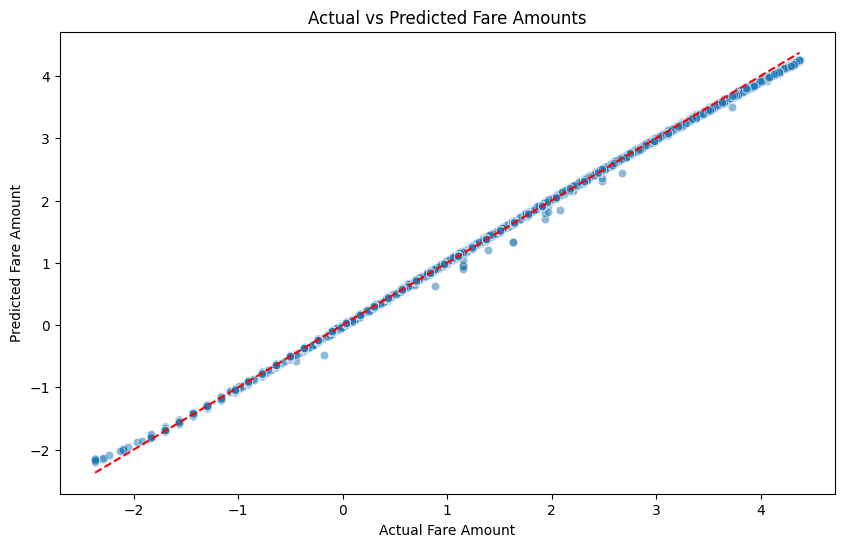

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=validation_df['fare_amount'], y=val_predictions, alpha=0.5)

# Adding a diagonal line for perfect prediction
plt.plot([validation_df['fare_amount'].min(), validation_df['fare_amount'].max()],
         [validation_df['fare_amount'].min(), validation_df['fare_amount'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amounts')
plt.show()

## Residual Plot: Prediction Errors

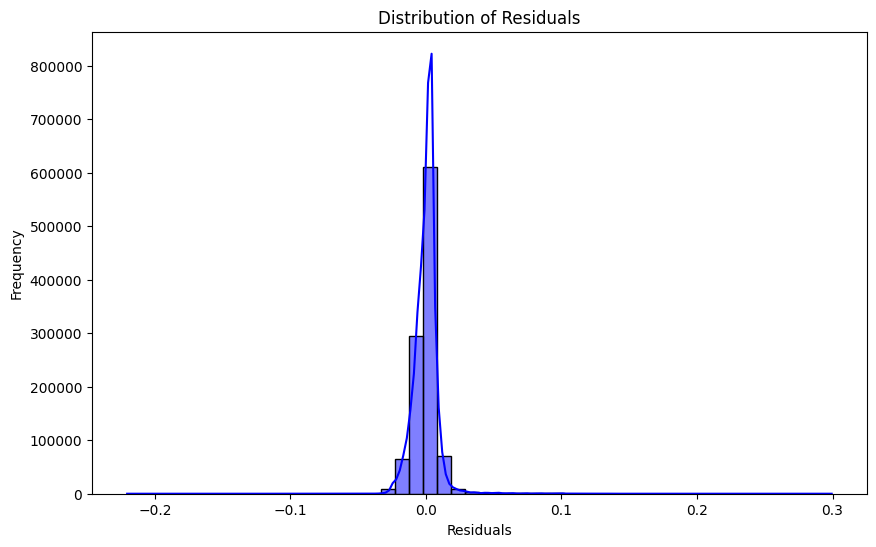

In [29]:
# Residuals
residuals = validation_df['fare_amount'] - val_predictions

# Residual plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=50)

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

## Error Metrics Bar Chart

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16416\2344191398.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


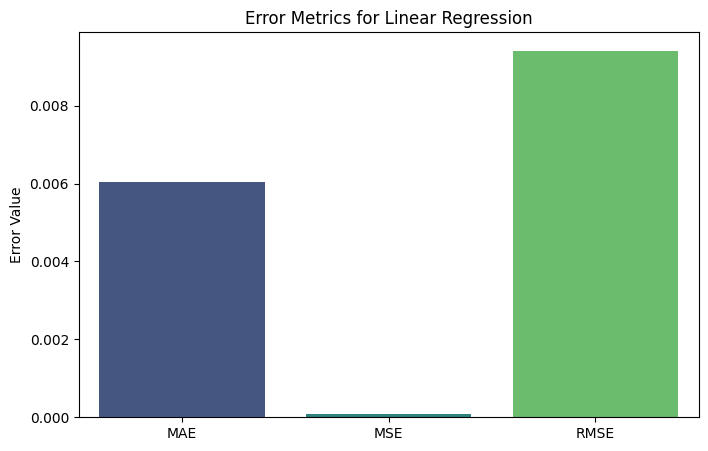

In [30]:
# Error metrics
metrics = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')

plt.ylabel('Error Value')
plt.title('Error Metrics for Linear Regression')
plt.show()

## Evaluate the model on the Test Set

In [31]:
test_predictions = linear_model.predict(test_df.drop('fare_amount', axis=1))

# Evaluate the model's performance on the test set
test_mae = mean_absolute_error(test_df['fare_amount'], test_predictions)
test_mse = mean_squared_error(test_df['fare_amount'], test_predictions)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(test_df['fare_amount'], test_predictions)

# Display the results
print(f"Linear Regression Performance on Test Set:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R-squared: {test_r2}")

Linear Regression Performance on Test Set:
MAE: 0.0060328186565582476
MSE: 8.768428771011903e-05
RMSE: 0.009363988878150114
R-squared: 0.999912296784594


## Scatter plot of actual vs predicted values on test set

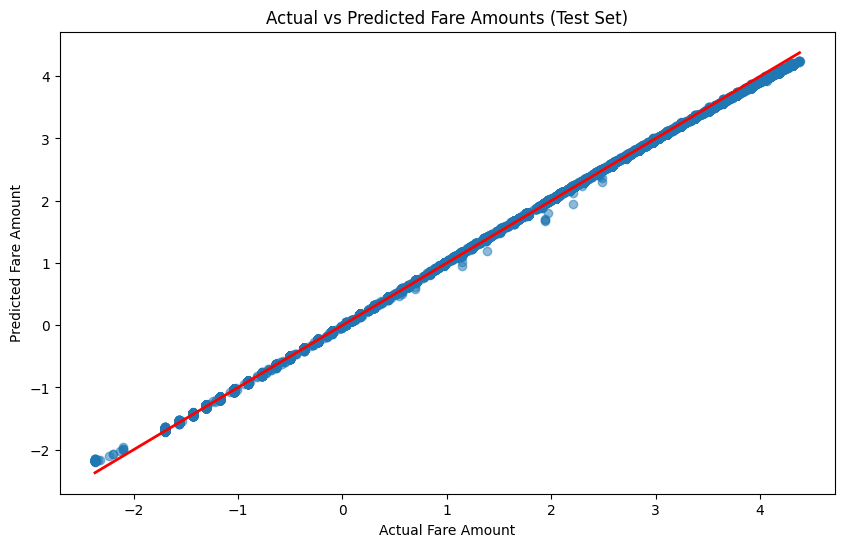

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(test_df['fare_amount'], test_predictions, alpha=0.5)
plt.plot([test_df['fare_amount'].min(), test_df['fare_amount'].max()],
         [test_df['fare_amount'].min(), test_df['fare_amount'].max()],
         'r', lw=2)
plt.title('Actual vs Predicted Fare Amounts (Test Set)')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.show()

## Residual plot on test set

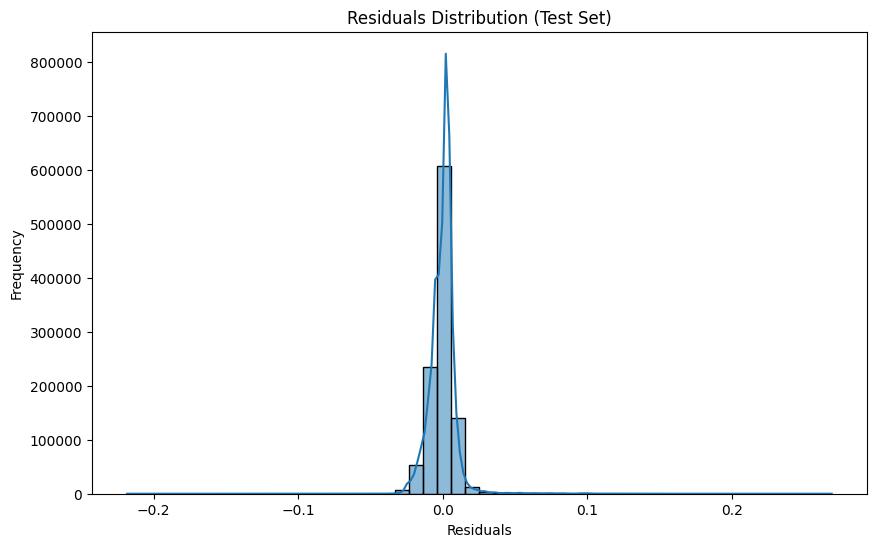

In [33]:
residuals = test_df['fare_amount'] - test_predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Residuals Distribution (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Error metrics bar chart on test set

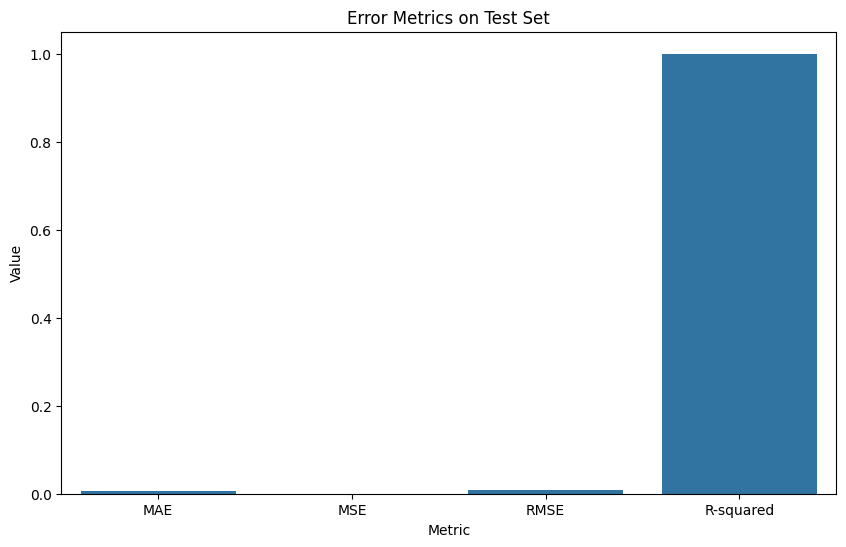

In [34]:
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [test_mae, test_mse, test_rmse, test_r2]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df)
plt.title('Error Metrics on Test Set')
plt.show()

# Linear Regression Model Analysis

## Overview
This notebook presents an analysis of a linear regression model used to predict fare amounts. We'll examine the model's performance through various metrics and visualizations.

## Error Metrics

Our model's performance is characterized by three key error metrics:

- **Mean Absolute Error (MAE)**: ~0.006
- **Mean Squared Error (MSE)**: Very close to 0
- **Root Mean Square Error (RMSE)**: ~0.009

### Insights
- The low MAE indicates that, on average, our predictions deviate from actual values by about 0.006 units.
- The near-zero MSE suggests that large errors are infrequent.
- RMSE being larger than MAE hints at the presence of some outliers or larger errors.

## Residual Analysis


The distribution of residuals (differences between predicted and actual values) provides valuable insights:

- Highly concentrated around zero with a sharp peak
- Slightly positively skewed
- Range: approximately -0.2 to 0.3, with most falling between -0.05 and 0.05

### Insights
- The concentration around zero indicates generally small errors.
- The slight positive skew suggests a minor tendency to underestimate values.

## Actual vs Predicted Values


This scatter plot compares actual fare amounts to our model's predictions:

- Strong linear relationship evident from tight clustering around the diagonal
- Consistent performance across the fare range (-2 to 4 units)
- Some outliers present, particularly for higher fare amounts

### Insights
- Excellent predictive performance across most of the data range
- Slight underperformance for some high-value fares

## Interpretation and Implications

1. The model demonstrates good fit for predicting fare amounts, with small and symmetrically distributed errors.
2. Performance is consistent across most of the fare range, indicating reliability for pricing or forecasting.
3. The tendency to underestimate higher fare amounts may require attention if accuracy in this range is crucial.

## Suggestions for Further Analysis

1. Investigate factors contributing to outliers, especially in higher fare amounts.
2. Conduct feature importance analysis to identify key variables influencing fare prediction.
3. Explore non-linear models or ensemble methods to potentially improve performance, particularly for high-value fares.

## Limitations and Potential Biases

- Slight bias towards underestimation, particularly for higher fares.
- Minor deviations from perfect normality in residual distribution may affect certain statistical inferences.

## Summary

Our linear regression model shows strong predictive performance for fare amounts, characterized by low error metrics and a good fit between actual and predicted values. It performs consistently across most of the fare range but may benefit from refinement for accurately predicting some higher-value fares. The slight positive skew in residuals suggests a minor tendency towards underestimation. Overall, the model appears suitable for its intended purpose, with potential for further optimization in handling outliers and high-value predictions.

---

# Data Analysis and Model Optimization Workflow

This notebook outlines a comprehensive approach to analyze and optimize our predictive model. We'll go through several key steps to ensure our model is robust, accurate, and interpretable.

## 1. Feature Importance Analysis

We begin by analyzing feature importance to understand which features contribute most significantly to our predictions.

**Why this step is important:** This analysis helps us identify the most influential features in our model, allowing us to focus on the most impactful variables and potentially simplify our model.

## 2. Multicollinearity Check

Next, we'll check for multicollinearity using Variance Inflation Factor (VIF).

**Why this step is important:** 
- Assesses correlation between independent variables in the regression model
- VIF values > 10 indicate high multicollinearity and should be addressed
- High multicollinearity can distort coefficient estimates and inflate standard errors, leading to unreliable statistical inference

## 3. Cross-Validation

We'll perform cross-validation to assess our model's performance and reliability.

**Why this step is important:** Cross-validation helps us analyze whether the model's performance is consistent and its accuracy can be trusted across different subsets of the data.

## 4. Residual Analysis

Residual analysis helps us check if the assumptions of linear regression are met.

**Why this step is important:**
- Checks key assumptions: Linearity, Independence, Homoscedasticity, and Normality
- Helps validate the model's appropriateness
- Can suggest improvements or alternative modeling approaches if assumptions are violated

## 5. Non-Linear Models

We'll explore non-linear models, such as Random Forests, to capture more complex relationships in the data.

**Why this step is important:**
- Ensures we're not missing out on potentially better models
- Can capture non-linear relationships between features and the target variable

## 6. Feature Engineering

This step involves creating new features from existing ones, such as polynomial features.

**Why this step is important:**
- Helps the model capture more complex patterns in the data
- Can reveal higher-order relationships that improve predictions

## 7. Model Interpretation

Finally, we'll use SHAP (SHapley Additive exPlanations) values to interpret our model's predictions.

**Why this step is important:**
- Provides insights into individual predictions
- Shows how much each feature contributes to each prediction
- Helps build trust in the model and reveals unexpected relationships in the data

## Conclusion

By following these steps, we ensure a thorough analysis of our data and model. This process helps us build a robust, accurate, and interpretable predictive model that we can confidently use for decision-making.

---

### Analyzing the feature importance (Which features are contributing the most)

In [36]:
feature_importance = pd.DataFrame({
    'feature': train_df.drop('fare_amount', axis=1).columns,
    'importance': abs(linear_model.coef_)
}).sort_values('importance', ascending=False)

In [37]:
imp = feature_importance.sort_values(['importance'], ascending = [0])

In [38]:
imp #Will look into the interpretation of these values later on

,feature,importance
20,pickup_hour,7.076444e+06
38,hour,7.076444e+06
22,pickup_month,2.151065e+04
39,month,2.151065e+04
30,log_fare_amount,1.418988e+00
28,log_trip_distance,7.018901e-01
1,trip_distance,5.125023e-01
34,boxcox_fare_amount,4.179568e-01
32,boxcox_trip_distance,1.827353e-01
16,ratecode_group_ride,2.809404e-02


### Calculating the Multicollinearity 

In [13]:
chunk_size = 500000
# Initialize an empty list to collect chunks
chunks = []
for chunk in pd.read_csv('scaled_eda1.csv', chunksize=chunk_size):
    chunks.append(chunk)
#Convert to dataframe
df3 = pd.concat(chunks, ignore_index=True)

In [14]:
df3.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,boxcox_fare_amount,boxcox_tip_amount,tip_given,tip_amount_transformed,hour,month,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,1.0,-0.446200,238,239,1.0,-0.767335,1.527338,0.038378,-0.141140,-0.032898,...,-0.767968,0.007112,1,0.410110,0,1,1.551130,0.252161,1.121102,-0.069330
1,1.0,-0.446200,239,238,1.0,-0.499769,1.527338,0.038378,-0.122839,-0.032898,...,-0.395814,0.029080,1,0.433048,0,1,1.212009,-0.012898,1.441136,0.187912
2,1.0,-1.057243,238,238,1.0,-0.767335,1.527338,0.038378,-0.427856,-0.032898,...,-0.767968,-0.362171,1,0.000000,0,1,1.551130,0.252161,1.441136,0.187912
3,1.0,-0.853562,238,151,1.0,-0.901117,-0.502998,0.038378,-0.208244,-0.032898,...,-0.970941,-0.074944,1,0.323179,0,1,1.551130,0.252161,1.699736,0.412787
4,1.0,-1.668286,193,193,2.0,-1.436249,-0.502998,0.038378,-1.037889,-0.032898,...,-1.917596,-1.397853,0,0.000000,0,1,0.176372,1.726368,0.143756,1.618643


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
#Calculating the multicollinearity
def calculate_vif(df):
    for col in df.select_dtypes(include=['bool']):
        df[col] = df[col].astype(int)

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_cols
    
    # Calculate VIF for each numeric column
    vif_data["VIF"] = [variance_inflation_factor(df[numeric_cols].values, i) 
                       for i in range(len(numeric_cols))]
    
    return vif_data.sort_values('VIF', ascending=False)

In [17]:
sample_df = df3.sample(n=100000, random_state=42)

In [18]:
print('fare_amount' in sample_df.columns)

True


In [19]:
X = sample_df.drop('fare_amount', axis = True)

In [20]:
print('fare_amount' in X.columns)

False


In [21]:
import numpy as np

In [22]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [23]:
vif_results = calculate_vif(X)

In [24]:
print(vif_results)

                     feature           VIF
22              pickup_month           inf
39                     month           inf
20               pickup_hour           inf
38                      hour           inf
29         log_trip_duration  5.712868e+05
33      boxcox_trip_duration  3.139006e+05
27             trip_duration  3.929264e+04
28         log_trip_distance  1.746181e+04
1              trip_distance  9.766191e+03
31            log_tip_amount  1.398144e+03
32      boxcox_trip_distance  1.281625e+03
35         boxcox_tip_amount  1.027965e+03
36                 tip_given  3.657571e+02
37    tip_amount_transformed  2.251171e+02
30           log_fare_amount  1.335487e+02
34        boxcox_fare_amount  1.086766e+02
4               payment_type  9.349011e+01
11            tip_percentage  2.458422e+01
7                 tip_amount  1.851295e+01
23        pickup_day_of_week  8.299325e+00
2               PULocationID  8.178384e+00
3               DOLocationID  7.572119e+00
12         

### Calculating the CV (Cross Validation) 

In [16]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(linear_model, train_df.drop('fare_amount', axis=1), train_df['fare_amount'], cv=5, scoring='r2')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean R-squared: {cv_scores.mean()}")

Cross-validation scores: [0.98461067 0.99991531 0.99991433 0.99991407 0.99988137]
Mean R-squared: 0.9968471501416275


In [17]:
#Similarly calculating the mean standard scores of the cross validation
cv_scores1 = cross_val_score(linear_model, train_df.drop('fare_amount', axis=1), train_df['fare_amount'], cv=5)
print(f"Mean Score: {cv_scores1.mean()}")

Mean Score: 0.9968471501416275


## Performing Residual Analysis

---

In [54]:
import matplotlib.pyplot as plt

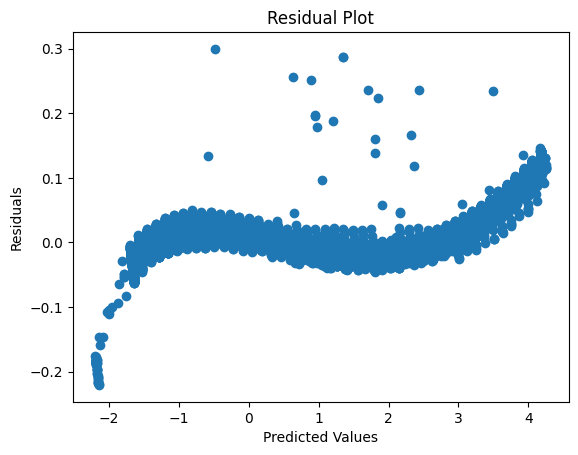

In [55]:
residuals = validation_df['fare_amount'] - val_predictions
plt.scatter(val_predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### What we learnt from the residual analysis 

## Overview
This document presents the findings from a residual analysis performed on our linear regression model. Despite high R-squared values, the residual plot revealed several important insights that suggest potential areas for model improvement.

## Key Observations

### 1. Non-linear Pattern
- **Observation**: The residual plot exhibits a clear non-linear pattern, evidenced by a curved shape in the residuals.
- **Implication**: Our linear model may not be fully capturing the underlying patterns in the data.

### 2. Heteroscedasticity
- **Observation**: The spread of residuals varies across predicted values, increasing slightly for higher predictions.
- **Implication**: Model performance may be inconsistent across different ranges of the predicted variable.

### 3. Bias
- **Observation**: 
  - For lower predicted values: residuals tend to be negative.
  - For higher predicted values: residuals tend to be positive.
- **Implication**: The model might be systematically under-predicting for low values and over-predicting for high values.

### 4. Outliers
- **Observation**: Potential outliers are visible, particularly at the extremes of the predicted value range.
- **Implication**: These outliers may be influencing model performance and warrant further investigation.

### 5. Residual Range
- **Observation**: Residuals mostly fall within a range of -0.2 to 0.3.
- **Implication**: Relatively small range, considering the model's high R-squared value.

## Interpretation
While our linear regression model demonstrated excellent performance metrics (very high R-squared), the residual plot uncovers several issues:

1. The presence of non-linear patterns suggests that a linear model might not be optimal for our data.
2. Heteroscedasticity indicates varying model performance across different ranges of the predicted variable.
3. Bias at the extremes points to systematic prediction errors for very low and very high values.

## Recommendations

1. **Explore Non-linear Models**: Consider alternatives such as Random Forest or polynomial regression to better capture non-linear relationships.

2. **Feature Engineering**: 
   - Investigate additional feature engineering techniques.
   - Consider including interaction terms or polynomial features.

3. **Outlier Analysis**: Conduct a thorough investigation of outliers to determine if they represent genuine anomalies or data issues.

4. **Variable Transformations**: 
   - Explore transformations of the target variable or predictor variables.
   - This may help address non-linearity and heteroscedasticity issues.

## Conclusion
This residual analysis highlights the importance of visualizing model diagnostics, even when numerical metrics appear excellent. By addressing these insights, we can potentially improve our model's performance and reliability across all ranges of our data.

### Using a Non-Linear Model this time to check the data complexity and model accuracy 

In [25]:
#Using RandomForestRegressor
#Due to dataset size using a simpler randomforest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [26]:
rf_model = RandomForestRegressor(random_state=42)

In [22]:
sample_size = 100000 
train_sample = train_df.sample(n=sample_size, random_state=42)

In [23]:
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=2, random_state=42)

In [ ]:
# rf_random.fit(train_df.drop('fare_amount', axis=1), train_df['fare_amount'])
# rf_predictions = rf_random.predict(validation_df.drop('fare_amount', axis=1))
# rf_r2 = r2_score(validation_df['fare_amount'], rf_predictions)
# print(f"Random Forest R-squared: {rf_r2}")

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [28]:
#Using a simple decision tree model as the Random Forest is too demanding for my PC


sample_size = 100000  # Adjust based on your computer's capabilities
df_sample = df3.sample(n=sample_size, random_state=42)

X = df_sample.drop('fare_amount', axis=1)
y = df_sample['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [29]:
dt_predictions = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, dt_predictions)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))

In [30]:
print(f"Decision Tree R-squared: {dt_r2}")
print(f"Decision Tree RMSE: {dt_rmse}")

Decision Tree R-squared: 0.9999954072908998
Decision Tree RMSE: 0.002129304640729962


In [31]:
print(f"Linear Model R-squared: {r2}") 
print(f"Linear Model RMSE: {rmse}")

Linear Model R-squared: 0.9999113198487734
Linear Model RMSE: 0.009421297458651307


### Using a custom plot to showcase how the two linear and Non-Linear models are performing 

In [34]:
import matplotlib.pyplot as plt 

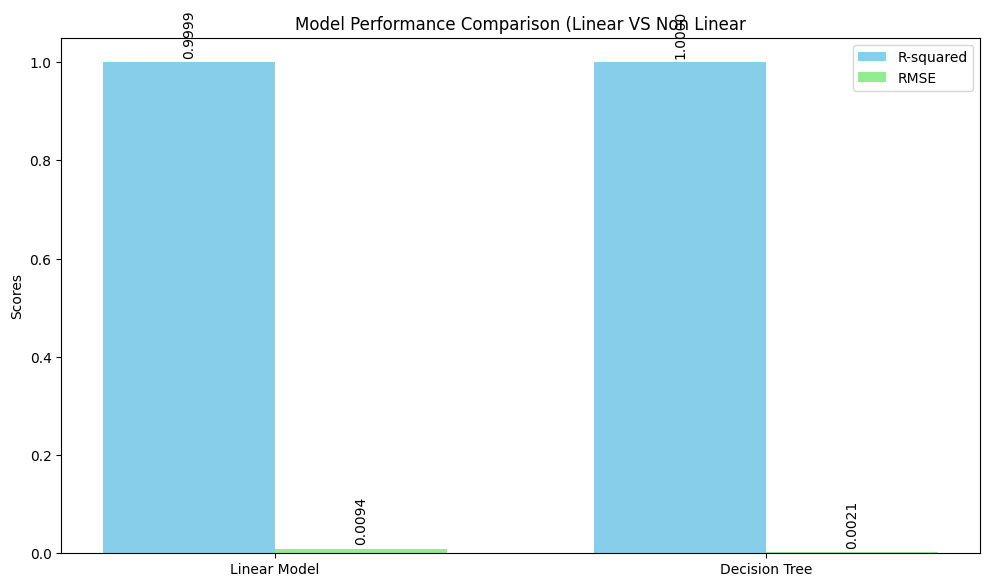

In [37]:
models = ['Linear Model', 'Decision Tree']
r_squared1 = [0.9999113319848773, 0.9999954072908998]
rmse1 = [0.009424297458651307, 0.002129304640729962]

# Setting  up the bar chart for the visualization here
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

# Create bars
ax.bar(x - width/2, r_squared1, width, label='R-squared', color='skyblue')
ax.bar(x + width/2, rmse1, width, label='RMSE', color='lightgreen')

# Customize the chart
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison (Linear VS Non Linear')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on the bars (Taken from the net here)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(ax.containers[0])
autolabel(ax.containers[1])

# Displayy
plt.tight_layout()
plt.show()

## Model Comparison Insights

### Performance Metrics
| Model         | R-squared    | RMSE          |
|---------------|--------------|---------------|
| Linear Model  | 0.9999113319 | 0.0094242975  |
| Decision Tree | 0.9999954073 | 0.0021293046  |

### Key Observations

1. **Exceptional Performance**: Both the linear regression and decision tree models demonstrate remarkably high predictive accuracy, with R-squared values extremely close to 1 and very low RMSE values.

2. **Marginal Difference**: The decision tree model shows a slight edge in performance, but the difference is minimal in practical terms.

3. **Linear Relationship Dominance**: The high performance of the linear model suggests that the relationship between the features and the target variable (fare amount) is predominantly linear.

4. **Potential Overfitting**: The near-perfect scores for both models, especially the decision tree, raise concerns about potential overfitting. This warrants further investigation, possibly through cross-validation or testing on completely held-out data.

### Conclusions

1. **Model Selection**: Given the negligible difference in performance, the linear regression model is preferable due to its simplicity, interpretability, and computational efficiency.

2. **Feature Importance**: The high performance of the linear model indicates that the feature engineering and selection process was highly effective in capturing the relevant information for fare prediction.

3. **Further Steps**:
   - Validate the model's performance on a completely separate test set to ensure generalizability.
   - Investigate feature importance in the linear model to understand key drivers of fare amounts.
   - Consider the practical implications of such high accuracy in a real-world scenario and ensure that the model is not inadvertently using information that wouldn't be available at the time of prediction.

4. **Business Impact**: The high predictive accuracy of the linear model suggests that it can be reliably used for fare estimation, potentially improving pricing strategies and customer expectations in the taxi service.

### Final Recommendation

Proceed with the linear regression model for its balance of high performance, interpretability, and efficiency. However, maintain awareness of the potential for overfitting and validate thoroughly before deployment in a production environment.

---

## Building a SHAP model for interpretation (Shapely Additive Explanations)

In [41]:
import shap
from sklearn.model_selection import train_test_split

In [42]:
X = df3.drop('fare_amount', axis=1)
y = df3['fare_amount']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Creating the SHAP explainer
explainer = shap.LinearExplainer(linear_model, X_train)

In [44]:
#Calculating the SHAP values

#We will be using a small sample of the dataset as there are performance issues 
shap_values = explainer.shap_values(X_test.iloc[:1000])

### Visualizing the SHAP values for better understanding 

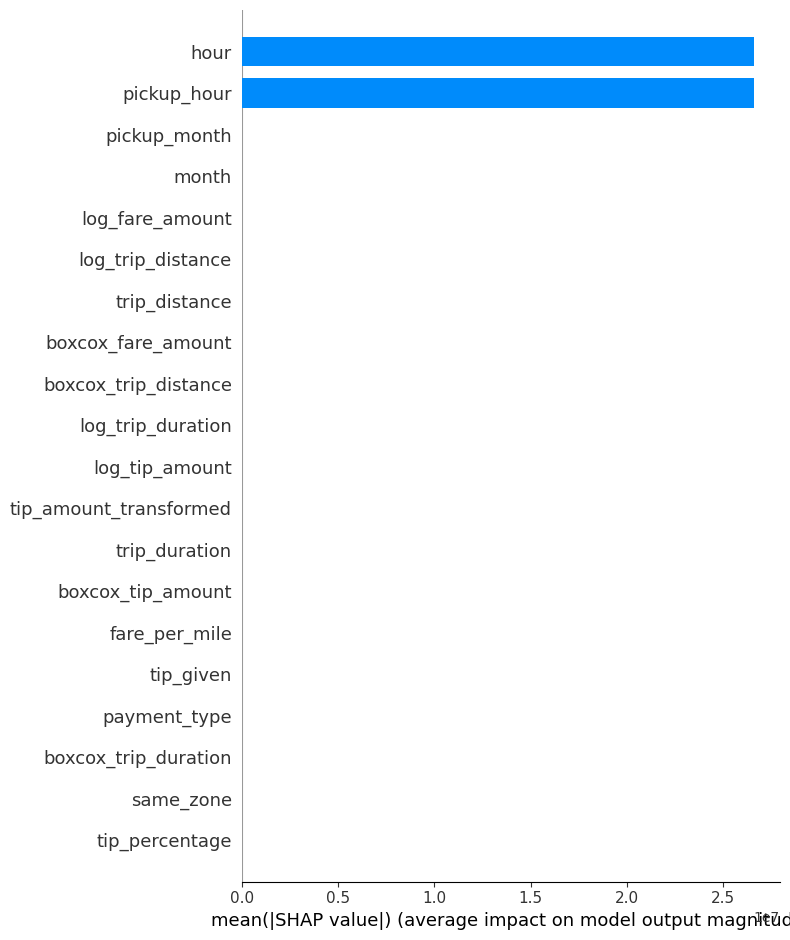

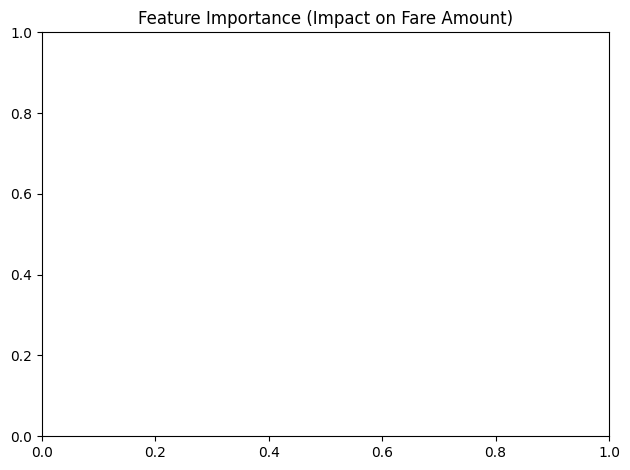

In [45]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test.iloc[:1000], plot_type="bar")
plt.title("Feature Importance (Impact on Fare Amount)")
plt.tight_layout()
plt.show()